Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

#### Always start with imports

In [25]:
import pandas as pd
import numpy as np

## Part 1: Simple Examples 

### 1.1 Concatenate
Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, `df1` and `df2`.

In [11]:
# Create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [12]:
# Create df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [13]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. Note that 'axis=0' is the default and doesn't have to be specified.
df3=pd.concat([df1, df2], axis=0) 
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [14]:
# Finally, let's stick the dataframes next to each other using `concat`. 
# Here, `axis=1` indicates a column operation.
df4=pd.concat([df1, df2], axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


### 1.2 Merge

Merging joins two datasets together based on a common key.

In [15]:
# stock prices.
openprice = pd.DataFrame({'Symbol': ['AAPL', 'DHR', 'DAL', 'AMZN'], 'OpenPrice': [217.51, 96.54, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,DHR,96.54
2,DAL,51.45
3,AMZN,1703.34


In [16]:
# stock names
stockname = pd.DataFrame({'Symbol': ['AMZN', 'DHR', 'DAL', 'AAPL'], 'Name': ['Amazon', 'Danaher', 'Delta Airlines', 'Apple']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,DHR,Danaher
2,DAL,Delta Airlines
3,AAPL,Apple


In [17]:
# Merge these dataframes.
named_stocks=pd.merge(openprice,  stockname)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,DHR,96.54,Danaher
2,DAL,51.45,Delta Airlines
3,AMZN,1703.34,Amazon


In [18]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['DAL', 'AMZN', 'AAPL', 'DHR'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11]})
wkhigh

,Symbol,52wkHigh
0,DAL,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,DHR,110.11


In [20]:
# Now merge that with the named stocks.
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,DHR,96.54,Danaher,110.11
2,DAL,51.45,Delta Airlines,60.79
3,AMZN,1703.34,Amazon,2050.49


### 1.3 Reshaping Datasets

Why reshape data?

**Some libraries prefer data in different formats**



> For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).  
[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets)    
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

**Hadley Wickham's Examples**  
From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.   
The table has two columns and three rows, and both rows and columns are labelled."

In [6]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data.   
Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [3]:
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

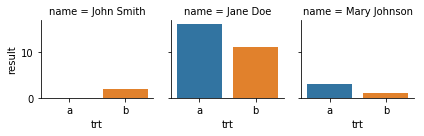

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Part 2: More complex examples 

### 2.1 Concatenating time-series datasets from Chicago

In [79]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [32]:
# Let's take a look at the first quarter.
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [33]:
# how about the second quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [68]:
# Do they have exactly the same columns?
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [71]:
# Let's define a function to check if they're REALLY equal.
def difference_checker(list1, list2):
    difference = list(set(list1) - set(list2))
    print ('The difference is: ', difference)

difference_checker(q1.columns, q2.columns)

The difference is:  []


In [75]:
# Now we're sure they're equal, let's concatenate them.
q1_q2=pd.concat([q1, q2], axis=0)
q1_q2.shape

(2000, 12)

In [74]:
# Confirm that did what we wanted it to.
print(q1.shape)
print(q2.shape)
print(q1_q2.shape)

(1000, 12)
(1000, 12)
(2000, 12)


In [81]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

allbikes=pd.concat([q1, q2, q3, q4], axis=0)
print(allbikes.shape)
allbikes.sample(4)

(4000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
882,4471058,1/23/2015 10:03,1/23/2015 10:12,1554,535,17,Wood St & Division St,285,Wood St & Grand Ave,Customer,NaN,NaN
541,7101118,8/24/2015 19:28,8/24/2015 19:59,1347,1829,302,Sheffield Ave & Wrightwood Ave,198,Green St (Halsted St) & Madison St,Customer,NaN,NaN
268,6569343,7/30/2015 9:06,7/30/2015 10:09,3715,3773,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NaN,NaN
496,8087329,10/26/2015 15:41,10/26/2015 15:55,2891,839,122,Ogden Ave & Congress Pkwy,183,Damen Ave & Augusta Blvd,Subscriber,Male,1975.0


## 2.2 Merging datasets about counties
Original sources:  
https://www.kaggle.com/muonneutrino/us-census-demographic-data/download  
https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [83]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [86]:
# Read that into Pandas, and check out 5 rows.
census=pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2790,49027,Utah,Millard County,12651,6462,6189,13.0,83.3,0.3,1.0,...,1.9,0.7,5.5,17.5,5546,73.6,17.5,8.7,0.1,2.9
105,4017,Arizona,Navajo County,107902,54037,53865,11.2,41.6,0.7,43.2,...,4.9,2.4,6.6,21.6,33186,62.1,31.9,5.8,0.2,16.3
2056,39027,Ohio,Clinton County,41869,20707,21162,1.6,93.4,2.1,0.1,...,3.0,1.5,4.0,25.6,19223,80.7,12.6,6.4,0.3,6.6
101,4011,Arizona,Greenlee County,9368,4997,4371,46.4,47.6,2.0,3.6,...,1.7,0.8,2.1,17.8,3675,82.8,13.0,4.0,0.2,7.6
2837,51035,Virginia,Carroll County,29767,14993,14774,3.1,95.0,0.2,0.1,...,1.0,0.1,4.1,25.8,13125,74.9,16.1,9.0,0.0,3.8


In [91]:
# What are all the columns?
print(census.columns)

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


In [90]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
commute=census[['CountyId', 'State', 'County', 'MeanCommute']]

23.47453416149071


In [93]:
# What's the average commute in the USA?
commute['MeanCommute'].mean()

23.47453416149071

In [95]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [99]:
# Take a look at that new data.
usda=pd.read_excel(source2)
usda.sample(5)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
1628,30061,MT,Mineral County,4223,8,"Nonmetro - Completely rural or less than 2,500..."
664,17139,IL,Moultrie County,14846,6,"Nonmetro - Urban population of 2,500 to 19,999..."
150,5079,AR,Lincoln County,14134,3,Metro - Counties in metro areas of fewer than ...
2965,53023,WA,Garfield County,2266,8,"Nonmetro - Completely rural or less than 2,500..."
1480,28159,MS,Winston County,19198,7,"Nonmetro - Urban population of 2,500 to 19,999..."


In [103]:
# What are those RUCC codes all about?
usda.groupby('RUCC_2013')[['Description']].max()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [106]:
# Let's shrink that USDA data to just the columns we need.
usda=usda[['FIPS', 'RUCC_2013']]

In [108]:
# Let's merge that with our census data about commute times.
metro_commute=pd.merge(commute, usda, left_on='CountyId', right_on='FIPS', how='left')
metro_commute.sample(5)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
1550,29135,Missouri,Moniteau County,25.1,29135.0,3.0
448,13125,Georgia,Glascock County,31.3,13125.0,9.0
3118,55141,Wisconsin,Wood County,19.7,55141.0,4.0
2828,51017,Virginia,Bath County,24.5,51017.0,8.0
2627,48209,Texas,Hays County,30.1,48209.0,1.0


In [111]:
# Is there any difference in commutes by rural-urban designation?
drivetimes=metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


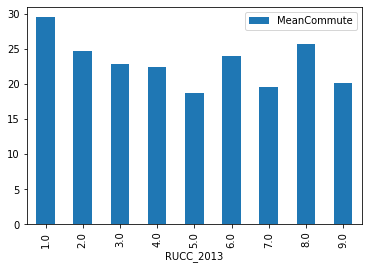

In [113]:
# Display that using the Pandas plotting function.
drivetimes.plot(kind='bar');

## 2.3. Instacart  Dataset

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-04-28 02:31:08--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.85.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.85.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  43.6MB/s    in 4.2s    

2019-04-28 02:31:12 (46.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
# bash command: list the contents of that folder.
!ls *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


**Goal: Reproduce this example**

The first two orders for user id 1:

In [8]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
# List the contents of the cwd.
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

### departments

### order_products__prior

### order_products__train

### orders

### products

## Concatenate order_products__prior and order_products__train

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

Merge with columns from `products`

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [9]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

## 4 ways to reshape and plot

### 1. value_counts

### 2. crosstab

### 3. Pivot Table

### 4. melt